## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  45.692549   791.371881  0.503085  9.379211  1.409152
1  97.788917   530.582365  0.899521  3.035841  1.235275
2   9.585871  1053.253357  0.311380  1.295959  1.411515
3  78.237595  1172.973750  0.910477  4.002619  1.542524
4  43.392520  1029.202151  0.321577  1.826768  1.382740


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0257820	total: 65.6ms	remaining: 1m 5s
1:	learn: 1.0174412	total: 66.2ms	remaining: 33s
2:	learn: 1.0103136	total: 66.7ms	remaining: 22.2s
3:	learn: 1.0025634	total: 67.3ms	remaining: 16.8s
4:	learn: 0.9931112	total: 67.8ms	remaining: 13.5s
5:	learn: 0.9850088	total: 68.2ms	remaining: 11.3s
6:	learn: 0.9753949	total: 68.6ms	remaining: 9.73s
7:	learn: 0.9662265	total: 69.1ms	remaining: 8.57s
8:	learn: 0.9584208	total: 69.5ms	remaining: 7.65s
9:	learn: 0.9496362	total: 70ms	remaining: 6.93s
10:	learn: 0.9425304	total: 70.5ms	remaining: 6.34s
11:	learn: 0.9353690	total: 70.9ms	remaining: 5.84s
12:	learn: 0.9281326	total: 71.4ms	remaining: 5.42s
13:	learn: 0.9197729	total: 71.9ms	remaining: 5.06s
14:	learn: 0.9122340	total: 72.3ms	remaining: 4.75s
15:	learn: 0.9048640	total: 72.7ms	remaining: 4.47s
16:	learn: 0.8964610	total: 73.1ms	remaining: 4.23s
17:	learn: 0.8898719	total: 73.6ms	remaining: 4.02s
18:	learn: 0.8841163	total: 74.1ms	remaining: 3.

123:	learn: 0.4315653	total: 119ms	remaining: 840ms
124:	learn: 0.4291518	total: 119ms	remaining: 836ms
125:	learn: 0.4265461	total: 120ms	remaining: 831ms
126:	learn: 0.4233924	total: 120ms	remaining: 826ms
127:	learn: 0.4210727	total: 121ms	remaining: 821ms
128:	learn: 0.4185644	total: 121ms	remaining: 816ms
129:	learn: 0.4161992	total: 121ms	remaining: 812ms
130:	learn: 0.4141258	total: 122ms	remaining: 808ms
131:	learn: 0.4109281	total: 122ms	remaining: 803ms
132:	learn: 0.4087034	total: 123ms	remaining: 799ms
133:	learn: 0.4058782	total: 123ms	remaining: 795ms
134:	learn: 0.4037476	total: 123ms	remaining: 790ms
135:	learn: 0.4015793	total: 124ms	remaining: 786ms
136:	learn: 0.4000037	total: 124ms	remaining: 782ms
137:	learn: 0.3973798	total: 124ms	remaining: 778ms
138:	learn: 0.3953375	total: 125ms	remaining: 773ms
139:	learn: 0.3927393	total: 125ms	remaining: 769ms
140:	learn: 0.3906100	total: 126ms	remaining: 766ms
141:	learn: 0.3885463	total: 126ms	remaining: 762ms
142:	learn: 

282:	learn: 0.2025822	total: 186ms	remaining: 471ms
283:	learn: 0.2017116	total: 186ms	remaining: 470ms
284:	learn: 0.2006025	total: 187ms	remaining: 469ms
285:	learn: 0.1999857	total: 187ms	remaining: 467ms
286:	learn: 0.1992619	total: 188ms	remaining: 466ms
287:	learn: 0.1986337	total: 188ms	remaining: 465ms
288:	learn: 0.1977362	total: 188ms	remaining: 463ms
289:	learn: 0.1966654	total: 189ms	remaining: 462ms
290:	learn: 0.1957858	total: 189ms	remaining: 461ms
291:	learn: 0.1952257	total: 189ms	remaining: 459ms
292:	learn: 0.1944064	total: 190ms	remaining: 458ms
293:	learn: 0.1935691	total: 190ms	remaining: 457ms
294:	learn: 0.1925561	total: 191ms	remaining: 456ms
295:	learn: 0.1921184	total: 191ms	remaining: 455ms
296:	learn: 0.1917065	total: 192ms	remaining: 453ms
297:	learn: 0.1911099	total: 192ms	remaining: 452ms
298:	learn: 0.1902234	total: 192ms	remaining: 451ms
299:	learn: 0.1891701	total: 193ms	remaining: 449ms
300:	learn: 0.1883834	total: 193ms	remaining: 448ms
301:	learn: 

546:	learn: 0.0808596	total: 300ms	remaining: 249ms
547:	learn: 0.0805565	total: 301ms	remaining: 248ms
548:	learn: 0.0805106	total: 301ms	remaining: 248ms
549:	learn: 0.0802070	total: 302ms	remaining: 247ms
550:	learn: 0.0801614	total: 302ms	remaining: 246ms
551:	learn: 0.0801164	total: 303ms	remaining: 246ms
552:	learn: 0.0798224	total: 303ms	remaining: 245ms
553:	learn: 0.0796260	total: 304ms	remaining: 244ms
554:	learn: 0.0793093	total: 304ms	remaining: 244ms
555:	learn: 0.0792655	total: 305ms	remaining: 243ms
556:	learn: 0.0790767	total: 305ms	remaining: 242ms
557:	learn: 0.0787847	total: 305ms	remaining: 242ms
558:	learn: 0.0784799	total: 305ms	remaining: 241ms
559:	learn: 0.0784366	total: 306ms	remaining: 240ms
560:	learn: 0.0783939	total: 306ms	remaining: 240ms
561:	learn: 0.0783518	total: 307ms	remaining: 239ms
562:	learn: 0.0783103	total: 307ms	remaining: 238ms
563:	learn: 0.0779405	total: 307ms	remaining: 238ms
564:	learn: 0.0775949	total: 308ms	remaining: 237ms
565:	learn: 

703:	learn: 0.0538052	total: 368ms	remaining: 155ms
704:	learn: 0.0537294	total: 368ms	remaining: 154ms
705:	learn: 0.0536689	total: 369ms	remaining: 154ms
706:	learn: 0.0535947	total: 369ms	remaining: 153ms
707:	learn: 0.0533755	total: 370ms	remaining: 152ms
708:	learn: 0.0533367	total: 370ms	remaining: 152ms
709:	learn: 0.0532634	total: 370ms	remaining: 151ms
710:	learn: 0.0530482	total: 371ms	remaining: 151ms
711:	learn: 0.0530100	total: 371ms	remaining: 150ms
712:	learn: 0.0529378	total: 372ms	remaining: 150ms
713:	learn: 0.0528826	total: 372ms	remaining: 149ms
714:	learn: 0.0526718	total: 372ms	remaining: 148ms
715:	learn: 0.0526346	total: 373ms	remaining: 148ms
716:	learn: 0.0524362	total: 373ms	remaining: 147ms
717:	learn: 0.0522599	total: 373ms	remaining: 147ms
718:	learn: 0.0520655	total: 374ms	remaining: 146ms
719:	learn: 0.0519818	total: 374ms	remaining: 145ms
720:	learn: 0.0519111	total: 374ms	remaining: 145ms
721:	learn: 0.0517382	total: 375ms	remaining: 144ms
722:	learn: 

965:	learn: 0.0282172	total: 482ms	remaining: 17ms
966:	learn: 0.0281076	total: 483ms	remaining: 16.5ms
967:	learn: 0.0280546	total: 483ms	remaining: 16ms
968:	learn: 0.0279882	total: 484ms	remaining: 15.5ms
969:	learn: 0.0279359	total: 484ms	remaining: 15ms
970:	learn: 0.0278276	total: 485ms	remaining: 14.5ms
971:	learn: 0.0277634	total: 485ms	remaining: 14ms
972:	learn: 0.0277093	total: 485ms	remaining: 13.5ms
973:	learn: 0.0276632	total: 486ms	remaining: 13ms
974:	learn: 0.0275591	total: 486ms	remaining: 12.5ms
975:	learn: 0.0275076	total: 487ms	remaining: 12ms
976:	learn: 0.0273904	total: 487ms	remaining: 11.5ms
977:	learn: 0.0273395	total: 487ms	remaining: 11ms
978:	learn: 0.0272463	total: 488ms	remaining: 10.5ms
979:	learn: 0.0271611	total: 488ms	remaining: 9.97ms
980:	learn: 0.0270724	total: 489ms	remaining: 9.47ms
981:	learn: 0.0270330	total: 489ms	remaining: 8.97ms
982:	learn: 0.0269939	total: 490ms	remaining: 8.46ms
983:	learn: 0.0269546	total: 490ms	remaining: 7.96ms
984:	le

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


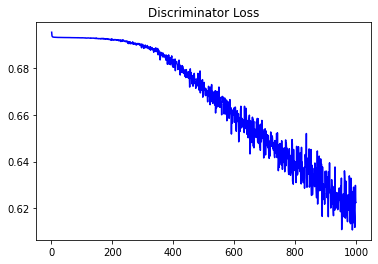

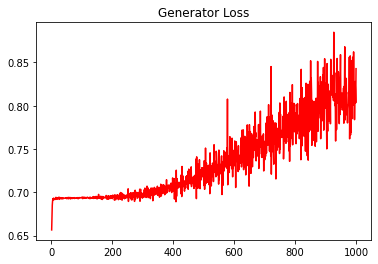

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.15851143592911093


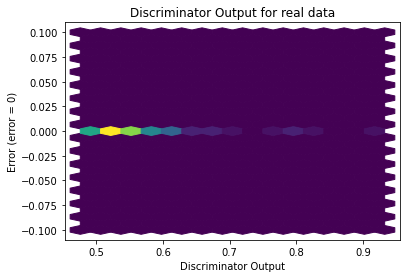

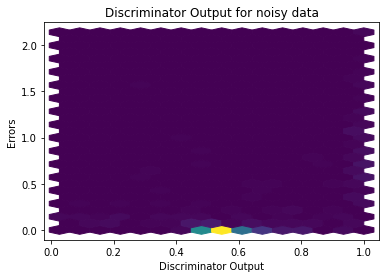

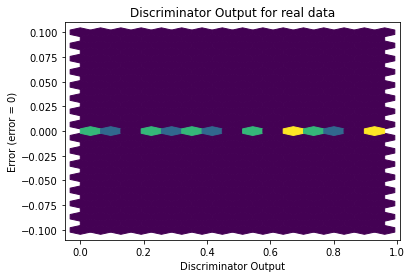

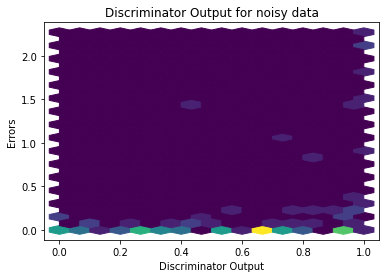

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
